# Newton method

Consider the function
$$
f(x) = \exp(x) - \frac{3}{2} - \arctan(x)
$$

In [1]:
%config InlineBackend.figure_format = 'svg'
from numpy import linspace,abs
from sympy import Symbol,exp,atan,diff,lambdify
from matplotlib.pyplot import figure,subplot,plot,grid,title

We define the function using sympy and automatically compute its derivative. Then we make functions out of these.

f =  exp(x) - atan(x) - 1.5
df=  exp(x) - 1/(x**2 + 1)


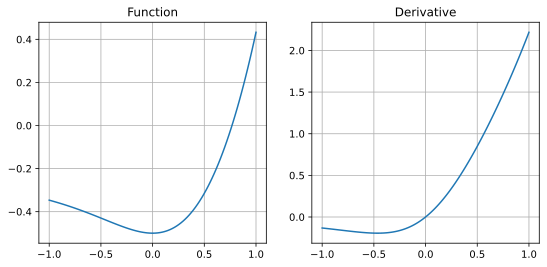

In [2]:
x = Symbol('x')

# Define the function
f = exp(x)-3.0/2.0-atan(x)

# Compute its derivative
df = diff(f,x)
print("f = ", f)
print("df= ", df)

# Make functions
F = lambdify(x, f, modules=['numpy'])
DF = lambdify(x, df, modules=['numpy'])

# Plot the functions
X = linspace(-1,1,100)
figure(figsize=(9,4))
subplot(1,2,1)
plot(X,F(X))
grid(True)
title('Function')
subplot(1,2,2)
plot(X,DF(X))
grid(True)
title('Derivative');

Now we implement the Newton method. We have to specify the maximum number of iterations, an initial guess and a tolerance to decide when to stop.

In [3]:
M   = 20    # maximum iterations
x   = 0.5   # initial guess
eps = 1e-14 # relative tolerance on root

f = F(x)
for i in range(M):
    df = DF(x)
    dx = -f/df
    x  = x + dx
    e  = abs(dx)
    f  = F(x)
    print("%6d %22.14e %22.14e %22.14e" % (i,x,e,abs(f)))
    if e < eps * abs(x):
        break

     0   8.71059792151655e-01   3.71059792151655e-01   1.72847808769943e-01
     1   7.76133043351671e-01   9.49267487999836e-02   1.30353403123729e-02
     2   7.67717620302437e-01   8.41542304923425e-03   9.81774270505387e-05
     3   7.67653269950858e-01   6.43503515784806e-05   5.71995606435394e-09
     4   7.67653266201279e-01   3.74957960683442e-09   2.22044604925031e-16
     5   7.67653266201279e-01   1.45556000556775e-16   0.00000000000000e+00


## Exercise

Modify the above Newton method implemention to use `while` loop.